In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('BHHcj_data.csv', names=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'TM', 'B', 'PrNd_p', 'La_p', 'Ce_p', 'BH', 'Hcj', 'Sum'])
X = df.iloc[:, :11].values
y = df['BH'].values

test_data = pd.DataFrame()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
cv = KFold(n_splits=5, shuffle=True, random_state=38)

In [34]:
def abserr(y_pred, y_test):
    err = np.abs(y_pred - y_test)
    return err.mean()

0.720715235572 2.16965348956


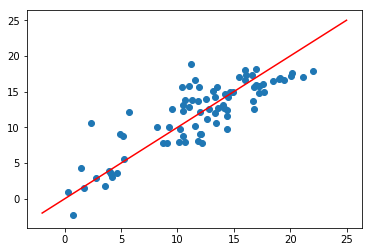

In [37]:
##### Linear ######
clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

0.728895281535 2.13224690397


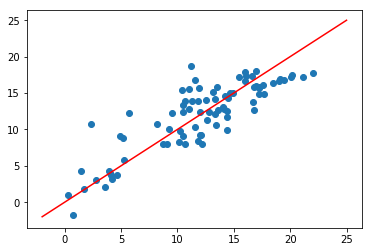

In [41]:
clf = LinearRegression()
clf.fit(X, y)
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)
test_data['Linear'] = y_pred

In [6]:
######## SVR ######
clf = SVR()
######## Range ########
C_range = 2 ** np.arange(0, 14)
gamma_range = 2 ** np.linspace(0, -10, 11)
tuned_parameters = dict(C=C_range, gamma=gamma_range)
######## Param #########


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'C': 4, 'gamma': 0.03125} with a score of 0.71754, test_score: 0.72126

{'C': 4, 'gamma': 0.03125}

Grid scores on development set:

r2: 0.2004, std: 0.048 for {'C': 1, 'gamma': 1.0}
r2: 0.3129, std: 0.053 for {'C': 1, 'gamma': 0.5}
r2: 0.4340, std: 0.066 for {'C': 1, 'gamma': 0.25}
r2: 0.5498, std: 0.063 for {'C': 1, 'gamma': 0.125}
r2: 0.6276, std: 0.058 for {'C': 1, 'gamma': 0.0625}
r2: 0.6644, std: 0.061 for {'C': 1, 'gamma': 0.03125}
r2: 0.6721, std: 0.067 for {'C': 1, 'gamma': 0.015625}
r2: 0.6583, std: 0.076 for {'C': 1, 'gamma': 0.0078125}
r2: 0.6426, std: 0.079 for {'C': 1, 'gamma': 0.00390625}
r2: 0.6176, std: 0.082 for {'C': 1, 'gamma': 0.001953125}
r2: 0.5894, std: 0.084 for {'C': 1, 'gamma': 0.0009765625}
r2: 0.2883, std: 0.050 for {'C': 2, 'gamma': 1.0}
r2: 0.4011, std: 0.059 for {'C': 2, 'gamma': 0.5}
r2: 0.5202, std: 0.068 for {'C': 2, 'gamma': 0.25}
r2: 0.6130, std: 0.064 for {'C': 2, 'gamma': 0.125}
r2: 0.6751, std: 0.058 for {'C': 2, 'gamma':

0.721263614805 1.9815035843


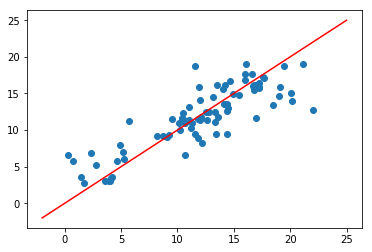

In [7]:
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['SVR'] = y_pred

0.864120197201 1.26434689745


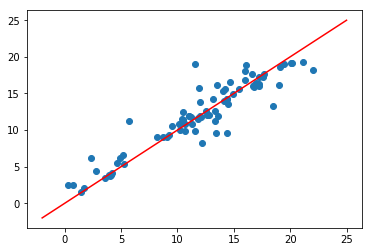

In [42]:
clf = SVR(C=4, gamma=0.03125)
clf.fit(X, y)
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)
test_data['SVR'] = y_pred

In [53]:
######## DTR ######
clf = DecisionTreeRegressor()
######## Range ########
max_depth = np.linspace(2, 21, 20, dtype=int)
min_samples_split = np.linspace(2, 31, 30, dtype=int)
tuned_parameters = dict(max_depth=max_depth, min_samples_split=min_samples_split)
######## Param #########


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'max_depth': 7, 'min_samples_split': 12} with a score of 0.71005, test_score: 0.73653

{'max_depth': 7, 'min_samples_split': 12}

Grid scores on development set:

r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 2}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 3}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 4}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 5}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 6}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 7}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 8}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 9}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 10}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 11}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_split': 12}
r2: 0.5289, std: 0.088 for {'max_depth': 2, 'min_samples_spli

0.736530801246 2.0384341945


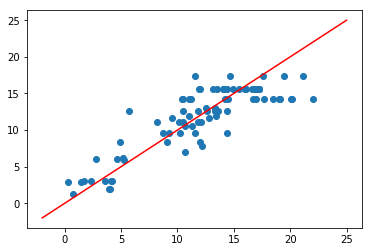

In [54]:
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['DTR'] = y_pred

0.797196627352 1.77409116678


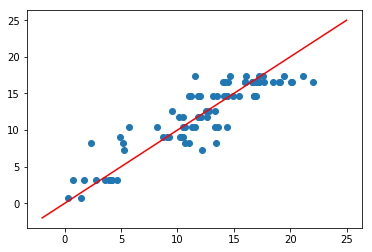

In [52]:
clf = DecisionTreeRegressor(max_depth=7, min_samples_split=50)
clf.fit(X, y)
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)
test_data['DTR'] = y_pred

In [63]:
clf = GradientBoostingRegressor(random_state=38)

######## Range ########
n_range = np.linspace(10, 290, 15, dtype=int)
learn = np.linspace(0.01, 0.29, 15)
######## Param #########
tuned_parameters_1 = dict(learning_rate=learn, n_estimators=n_range)


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters_1, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'learning_rate': 0.14999999999999999, 'n_estimators': 50} with a score of 0.75008, test_score: 0.80319

{'learning_rate': 0.14999999999999999, 'n_estimators': 50}

Grid scores on development set:

r2: 0.0923, std: 0.045 for {'learning_rate': 0.01, 'n_estimators': 10}
r2: 0.2908, std: 0.055 for {'learning_rate': 0.01, 'n_estimators': 30}
r2: 0.4291, std: 0.062 for {'learning_rate': 0.01, 'n_estimators': 50}
r2: 0.5236, std: 0.064 for {'learning_rate': 0.01, 'n_estimators': 70}
r2: 0.5869, std: 0.063 for {'learning_rate': 0.01, 'n_estimators': 90}
r2: 0.6293, std: 0.061 for {'learning_rate': 0.01, 'n_estimators': 110}
r2: 0.6586, std: 0.058 for {'learning_rate': 0.01, 'n_estimators': 130}
r2: 0.6786, std: 0.056 for {'learning_rate': 0.01, 'n_estimators': 150}
r2: 0.6927, std: 0.054 for {'learning_rate': 0.01, 'n_estimators': 170}
r2: 0.7032, std: 0.052 for {'learning_rate': 0.01, 'n_estimators': 190}
r2: 0.7110, std: 0.050 for {'learning_rate': 0.01, 'n_estimator

In [6]:
clf = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90,random_state=38)
######## Range ########
max_depth = np.linspace(2, 12, 11, dtype=int)
######## Param #########
tuned_parameters_2 = dict(max_depth=max_depth)


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters_2, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'max_depth': 3} with a score of 0.74483, test_score: 0.80900

{'max_depth': 3}

Grid scores on development set:

r2: 0.7419, std: 0.032 for {'max_depth': 2}
r2: 0.7448, std: 0.030 for {'max_depth': 3}
r2: 0.7358, std: 0.030 for {'max_depth': 4}
r2: 0.7083, std: 0.041 for {'max_depth': 5}
r2: 0.7021, std: 0.027 for {'max_depth': 6}
r2: 0.6847, std: 0.045 for {'max_depth': 7}
r2: 0.6737, std: 0.058 for {'max_depth': 8}
r2: 0.6764, std: 0.066 for {'max_depth': 9}
r2: 0.6592, std: 0.075 for {'max_depth': 10}
r2: 0.6465, std: 0.074 for {'max_depth': 11}
r2: 0.6347, std: 0.076 for {'max_depth': 12}



0.861909943235 1.28378318209


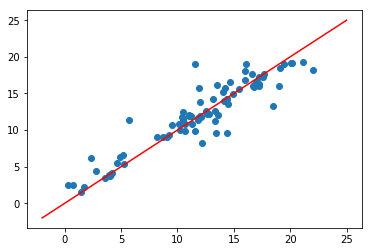

In [30]:
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['GBDT'] = y_pred

0.904866906847 1.13046552166


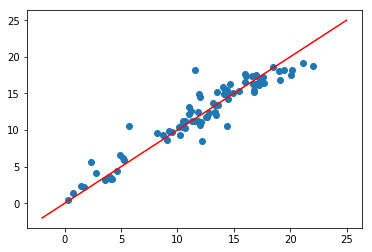

In [48]:
clf = GradientBoostingRegressor()
clf.fit(X, y)
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)
test_data['GBDT'] = y_pred

In [55]:
test_data['Mesured'] = y_test
test_data.to_csv('Four_BH.csv')

In [17]:
def test_model(clf, x=X_train, y=y_train, randn=38):               
    r2_val_score = cross_val_score(clf, x, y, cv=cv, n_jobs=-1)   
    scores=r2_val_score.mean()
    stds=r2_val_score.std()
    return np.array([scores, stds]) 

In [18]:
results = {}

clf = LinearRegression()  
results["Linear"]=test_model(clf)  

clf = SVR(C=100)  
results["SVM RBF"]=test_model(clf) 

clf = DecisionTreeRegressor()  
results["RandomForest"]=test_model(clf) 

clf = GradientBoostingRegressor()
results["GradientBoosting"]=test_model(clf)

,R Square Score,Std
SVM RBF,0.566263,0.076657
RandomForest,0.618683,0.074211
Linear,0.650819,0.049617
GradientBoosting,0.747458,0.029174


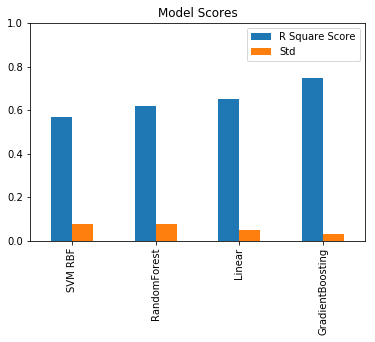

In [19]:
results1 = pd.DataFrame.from_dict(results,orient='index') 
results1.columns=['R Square Score', 'Std'] 
results1 = results1.sort_values(by='R Square Score')
#results1['Std'] = results1['Std'] * 10
results1.plot(kind="bar",title="Model Scores") 
axes = plt.gca()  
axes.set_ylim([0,1])
results1

In [68]:
def mater(CepRs, REs, La=0.0, Co=0.0, TM=1.0, B=6.0):
    Ce = (REs - La) * CepRs
    PrNd = REs - La - Ce
    Fe = 100.0 - PrNd - Ce - La - Co -TM - B
    PrNd_p, La_p, Ce_p = PrNd / REs, La / REs, Ce / REs
    one_mater = [REs, PrNd, La, Ce, Fe, Co, TM, B, PrNd_p, La_p, Ce_p]
    return one_mater

In [69]:
list_1 = []
ceprs = np.linspace(0, 1, 21)
res = np.linspace(6, 18, 21)

for i in ceprs:
    for j in res:
        list_1.append(mater(i, j))

a = np.array(list_1)
new = pd.DataFrame(a, columns=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'TM', 'B', 'PrNd_p', 'La_p', 'Ce_p'])
new.head(2)

,REs,PrNd,La,Ce,Fe,Co,TM,B,PrNd_p,La_p,Ce_p
0,6.0,6.0,0.0,0.0,87.0,0.0,1.0,6.0,1.0,0.0,0.0
1,6.6,6.6,0.0,0.0,86.4,0.0,1.0,6.0,1.0,0.0,0.0


In [70]:
new_bh = clf.predict(new.values).reshape(len(ceprs), len(res))
new_2 = pd.DataFrame(new_bh, index=ceprs, columns=res)
new_2.to_csv('preds_bh.csv')